## Introduction

So, you want to do some machine learning?

To the beginner, machine learning carries a certain mystique to it. I personally thought it had to be on the level of VIKI from "I, Robot":

![alt text](VIKI.jpg "Title")

You come off with the impression that machine learning can pretty much solve any problem you throw at it. 

But machine learning isn't dark magic, and once you understand the scope of what is considered machine learning, you can start to think of the kinds of problems you may be able to take a stab at with a machine learning technique.

This workshop won't be all encompassing -- for that we would need an entire course or two. But we will give you enough theory to get you on your feet, and enough practical experience to try your hand at a machine learning problem with the package `scikit-learn`

## Supervised learning

For the purposes of this workshop, we are going to focus on a subset of machine learning techniques known as supervised learning.

At the very core of machine learning is relating a series of inputs <b>Y</b> to an output variable <b>X</b>. The relationship between <b>X</b> (also called the predictors) and <b>Y</b> (also called the response variable) can be expressed as:

<center><i>Y = f(X) + $\epsilon$</i></center>

Machine learning is essentially coming up with a model for <i>f</i>:

<center><i>$\hat{Y}$ = $\hat{f}$(X)</i></center>

In some cases, we aren't interested in the form of <i>$\hat{f}$(X)</i> at all: we just want to obtain accurate estimates of new <i>Y</i> values given a set of <i>X</i> values. If <i>$\hat{f}$(X)</i> were a black box and we didn't know exactly what was going on inside, we wouldn't mind too much. This is called **prediction**.

In other cases, we are more interested in the form of <i>$\hat{f}$(X)</i> itself: we want to know how changes in <i>X</i> affect the output <i>Y</i>. In this case, a black box isn't ideal, and we may be willing to sacrifice accuracy in output <i>Y</i> values if we still get a general behavior in the relationship between <i>X</i> and <i>Y</i>. This is called **inference**.

At this point, you may be wondering... wait, wait wait. This all seems too familiar. Isn't this just linear regression? I've done problems like this before! And yes, you would be right.

When you hear machine learning, just think "fancy statistics."

<img src="fancy_statistics.jpg" alt="Drawing" style="width: 300px;"/>

In [ ]:
fdsdf

## Tour of scikit-learn

Lets head to the [sklearn](https://scikit-learn.org/stable/) website and take a look around.

Scikit-learn can be broken down into a number of common tasks (that don't align perfectly with the modules in the package):

* classification
* regression
* clustering
* dimensionality reduction
* model selection
* pre-processing

We have already talked about classification and regression briefly, but there are modules for alternate analyses (for instance *clustering*, an unsupervised learning approach) and steps performed prior to implementing a machine learning model (e.g. *pre-processing* and *dimensionality reduction*). *Model selection* is another important step that we'll demo below.

## Regression

We're going to first start REALLY simple and use a simple linear regressor on a self-generated dataset with one predictor (x) and one reponse (y), introducing a few key machine learning concepts along the way.

While linear regression used in a statistics settings is primarily used to describe the data, machine learning usually goes beyond description (prediction and inference) and will require a few different toolsets to achieve that purpose.

In [18]:
import numpy as np

We will start with a basic model:

<center><i>y = 3x + 4</i></center>

Text(0,0.5,'y')

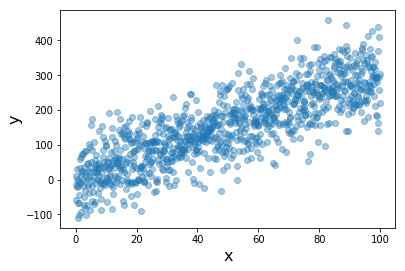

In [112]:
n = 1000
noise = 0.20

x = np.linspace(0, 100, num=n)
b0 = 4
b1 = 3
y = b0 + b1*x
y = y + noise*(y.max()-y.min())*np.random.normal(size=n)

plt.scatter(x, y, alpha=0.4)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

The first thing that may be new to you is we're going to split our original dataset in two: one portion called the **training dataset** so-called because we are going to *train* our model using these datapoints. In general, this is done randomly, and the fraction of the data allocated to the training dataset is up to you-- with the understanding that the less data in the training dataset, the worse the model.

The second portion, called the **test dataset** is used to evaluate how well our model performs. In this setting, our model was blind to all datapoints in the test dataset. You can evaluate error in terms of the training dataset too, but you may be overly optimistic in your model's performance.

Try a few different iterations of training-test dataset splits:

In [30]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

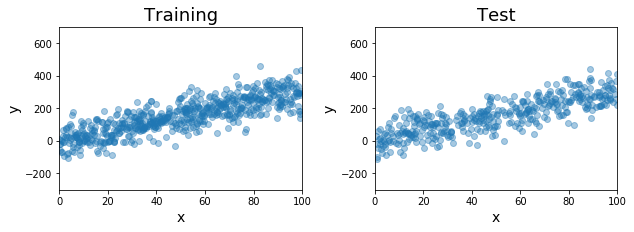

In [114]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

for ax, xi, yi, title in zip(axes, [x_train, x_test], [y_train, y_test], ['Training', 'Test']):
    ax.scatter(xi, yi, alpha=0.4)
    ax.set_xlim([0, 100])
    ax.set_ylim([-300, 700])
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_title(title, fontsize=18)
fig.subplots_adjust(wspace=0.3)

Now, the moment you've been waiting for: some linear regression!

In [62]:
from sklearn import linear_model

In [140]:
linmodel = linear_model.LinearRegression()

linmodel.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
b0_hat = linmodel.intercept_[0]
b1_hat = linmodel.coef_[0][0]
print('intercept (b0_hat): {0:.2f} \nslope (b1_hat): {1:.2f}'.format(b0_hat, b1_hat))

intercept (b0_hat): 1.04 
slope (b1_hat): 3.07


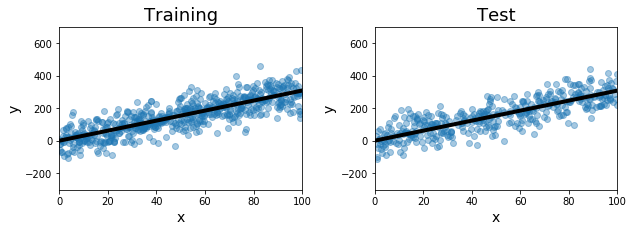

In [116]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
yp_test = b0_hat + b1_hat*x_test
yp_train = b0_hat + b1_hat*x_train

for ax, xi, yi, title in zip(axes, [x_train, x_test], [y_train, y_test], ['Training', 'Test']):
    ax.scatter(xi, yi, alpha=0.4)
    ax.plot(x, b0_hat + b1_hat*x, c='k', linewidth=4)
    ax.set_xlim([0, 100])
    ax.set_ylim([-300, 700])
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_title(title, fontsize=18)
fig.subplots_adjust(wspace=0.3)

How do you evaluate your model? It obviously couldn't predict the outputs perfectly, as there was quite a bit of noise. You may be familiar with the $R^2$ value, which is one way, but we'll look at a few different ones. You can check out a few regression metrics in `sklearn.metrics` module.

The first one we will look at is the **Mean Squared Error (MSE)**, which is the average squared residual:

<center> &nbsp; </center>
<center>$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$</center>

In [109]:
from sklearn.metrics import mean_squared_error

In [117]:
print('Train MSE: {0:.2f}'.format(mean_squared_error(y_train, yp_train)))
print('Test MSE: {0:.2f}'.format(mean_squared_error(y_test, yp_test)))

Train MSE: 3573.49
Test MSE: 3806.10


Notice that the test MSE is lower than the training MSE. This isn't always the case, but more often than not is-- because the model was based on the training dataset.

It's perhaps easier to interpret the square root of the mean squared error, which has the same units as *y*. You can think of this as the average deviation between our model prediction at a given *x* value and the actual value. In this case, it looks like we deviate by ~ 60 units of y with our current model. Another way to visualize this is a *parity plot*:

Text(0,0.5,'$\\hat{y}$ (test)')

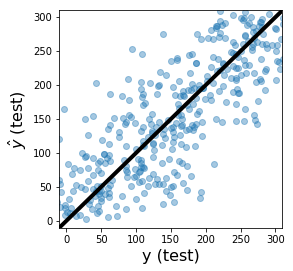

In [118]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(y_test, yp_test, alpha=0.4)
ax.plot(np.array([-10, 310]), np.array([-10, 310]), c='k', linewidth=4)
ax.set_xlim([-10, 310])
ax.set_ylim([-10, 310])
ax.set_xlabel('y (test)', fontsize=16)
ax.set_ylabel(r'$\hat{y}$ (test)', fontsize=16)

The MSE is a little more difficult to interpret because it is *unbounded*: it can theoretically take on any positive value, and we can only interpret it in the context of the original dataset. It would be nicer if we had a generalizable measure so we could distinguish a good model from a bad model with a single number. For that, we can use the $R^2$

In [102]:
from sklearn.metrics import r2_score

In [119]:
print('Train R2: {0:.2f}'.format(r2_score(y_train, yp_train)))
print('Test R2: {0:.2f}'.format(r2_score(y_test, yp_test)))

Train R2: 0.69
Test R2: 0.67


### Now it's your turn

Try changing the size of the train-test split and see how it affects your MSE values and the parameters of your model (b0 and b1). Provide the following:

* A plot of training MSE and test MSE as a function of the size of the training dataset
* A plot of b0 adn b1 as a function of the size of the training dataset.

In [184]:
training_size = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
b0_hat = [0]*11
b1_hat = [0]*11
mse_train = [0]*11
mse_test = [0]*11

for counter, i in enumerate(training_size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-i)
    linmodel = linear_model.LinearRegression()
    linmodel.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
    b0_hat[counter] = linmodel.intercept_[0]
    b1_hat[counter] = linmodel.coef_[0][0]
    #print('intercept (b0_hat): {0:.2f} \nslope (b1_hat): {1:.2f}'.format(b0_hat, b1_hat))

    yp_test = b0_hat[counter] + b1_hat[counter]*x_test
    yp_train = b0_hat[counter] + b1_hat[counter]*x_train

    mse_train[counter] = mean_squared_error(y_train, yp_train)
    mse_test[counter] = mean_squared_error(y_test, yp_test)


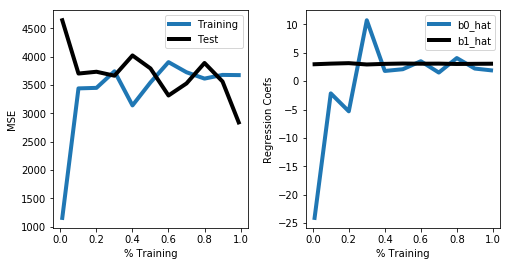

In [185]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

axes[0].plot(training_size, mse_train, linewidth=4, label='Training')
axes[0].plot(training_size, mse_test, linewidth=4, c='k', label='Test')
axes[0].legend()
axes[0].set_xlabel('% Training')
axes[0].set_ylabel('MSE')

axes[1].plot(training_size, b0_hat, linewidth=4, label='b0_hat')
axes[1].plot(training_size, b1_hat, linewidth=4, c='k', label='b1_hat')
axes[1].legend()
axes[1].set_xlabel('% Training')
axes[1].set_ylabel('Regression Coefs')

fig.subplots_adjust(wspace=0.3)

You may have noticed that your MSE and coefficient profiles change if you rerun the analysis. Train-test splits are done randomly, so you will get different models for different train-test splits. There are multiple ways to approach this. Try out the `sklearn.model_selection` for some ideas.

If you do want to try something more advanced during this exercise, try adding in a nested for loop in the above analysis so you perform repeats of each train-test splitting configuration. Then graph the average MSE and coefficient values as a function of the size of the training dataset. Your curves should look smoother, and you should be able to learn a few things about selecting an appropriate train-test split.

In [186]:
training_size = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
b0_hat = np.zeros((11, 1000))
b1_hat = np.zeros((11, 1000))
mse_train = np.zeros((11, 1000))
mse_test = np.zeros((11, 1000))

from sklearn.model_selection import KFold

for counter, i in enumerate(training_size):
    counter2 = 0
    for j in range(1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-i)
        linmodel = linear_model.LinearRegression()
        linmodel.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
        b0_hat[counter, counter2] = linmodel.intercept_[0]
        b1_hat[counter, counter2] = linmodel.coef_[0][0]
        #print('intercept (b0_hat): {0:.2f} \nslope (b1_hat): {1:.2f}'.format(b0_hat, b1_hat))

        yp_test = b0_hat[counter, counter2] + b1_hat[counter, counter2]*x_test
        yp_train = b0_hat[counter, counter2] + b1_hat[counter, counter2]*x_train

        mse_train[counter, counter2] = mean_squared_error(y_train, yp_train)
        mse_test[counter, counter2] = mean_squared_error(y_test, yp_test)
        counter2 += 1

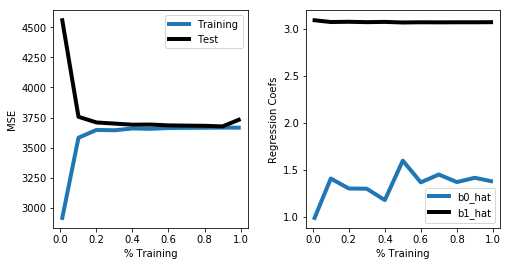

In [187]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

axes[0].plot(training_size, np.mean(mse_train, axis=1), linewidth=4, label='Training')
axes[0].plot(training_size, np.mean(mse_test, axis=1), linewidth=4, c='k', label='Test')
axes[0].legend()
axes[0].set_xlabel('% Training')
axes[0].set_ylabel('MSE')

axes[1].plot(training_size, np.mean(b0_hat, axis=1), linewidth=4, label='b0_hat')
axes[1].plot(training_size, np.mean(b1_hat, axis=1), linewidth=4, c='k', label='b1_hat')
axes[1].legend()
axes[1].set_xlabel('% Training')
axes[1].set_ylabel('Regression Coefs')

fig.subplots_adjust(wspace=0.3)

We have just barely scratched the surface of regression techniques. In this example, we stuck to a 1D predictor dataset, but you can easily try a similar approach using *multiple linear regression* using the same exact function `linear_model.LinearRegression`.

If you have tried multiple linear regression on your dataset, and it isn't quite giving you the accuracy you want, you can try a host of other regression models. To name a few:

* LASSO regression
* Ridge regression
* Neural Networks
* Passive aggressive regression
* Huber regression

## Classification

Classification is used when the response variable *y* is qualitative. Some of these may seem a little less intuitive than the regression example shown above, but the concept is still the same. We still are trying to obtain accurate predictions of a response variable based on a set of predictors.

A few examples of classification:

* Astronomers need to catalogue distant objects in the sky (star, galaxy, nebula, etc) based on long-exposure CDC images

* Researchers investigating the behavior of viruses in vivo need to classify motion type based on trajectory datasets collected via confocal microscopy

* Researchers have collected the phenotypes of individual cells in an organism and want to classify them by cell type

Let's set up a classification dataset to play with:

In [270]:
n = 2000
x = np.random.randint(low=0, high=50, size=(2,n))
y2 = x[1, :] + np.random.randint(low=-10, high=10, size=n)
cl = y2 > (440 + 10*x[0, :] - 1.4*x[0, :]**2 + 0.028*x[0, :]**3)*50/800

In [268]:
cl.shape

(2000,)

Text(0,0.5,'$x_2$')

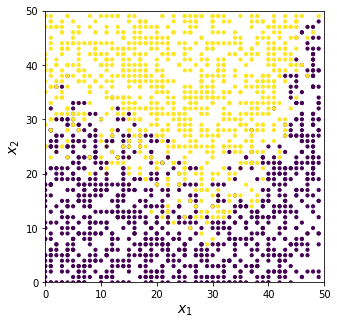

In [271]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x[0, :], x[1, :], c=cl, cmap='viridis', s=10)
xm = np.linspace(0, 50, 50)
#ax.plot(xm, (440 + 10*xm - 1.4*xm**2 + 0.028*xm**3)*50/800)
ax.set_xlim([0,50])
ax.set_ylim([0,50])
ax.set_xlabel(r'$x_1$', fontsize=14)
ax.set_ylabel(r'$x_2$', fontsize=14)

In the classification approach, we want to predict the class (in this case, whether the dot is yellow or purple) based on the values of the two predictors available to us, $x_1$ and $x_2$. 

You can probably easily do this visually -- just draw a squiggly line such that most of the yellow are above and most of the purple are below. But how do we tell a computer to do that, or express that mathematically?

One of the most basic approaches uses a local sampling technique of the training dataset to calculate probabilities. The algorithm goes like this:

1. select a coordinate in ($x_1$, $x_2$) space
2. find the $k$ nearest neighbors in the training dataset to that point
3. calculate the fraction of yellow dots in the sample (the estimated probability that a point at the given coordinate is yellow)
4. repeat over entire ($x_1$, $x_2$) space

This approach has a tuning variable $k$ that will affect how "smooth" the predicted outputs are. Normally users will train several models using different $k$ values to get the highest prediction accuracies.

In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x.transpose(), cl, test_size=0.2)

kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(x_train, y_train)

yp_train = kmodel.predict(x_train)
yp_test = kmodel.predict(x_test)

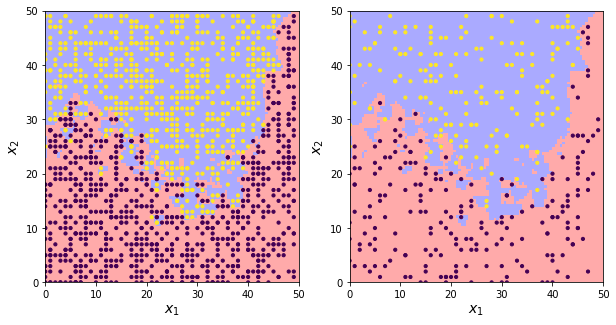

In [275]:
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
h = 0.5
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

for ax, xi, yi, title in zip(axes, [x_train, x_test], [yp_train, yp_test], ['Training', 'Test']):
    
    xm = np.linspace(0, 50, 50)
    #ax.plot(xm, (440 + 10*xm - 1.4*xm**2 + 0.028*xm**3)*50/800)
    ax.set_xlim([0,50])
    ax.set_ylim([0,50])
    ax.set_xlabel(r'$x_1$', fontsize=14)
    ax.set_ylabel(r'$x_2$', fontsize=14)
    
    x_min, x_max = xi[:, 0].min() - 1, xi[:, 0].max() + 3
    y_min, y_max = xi[:, 1].min() - 1, xi[:, 1].max() + 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = kmodel.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    ax.scatter(xi[:, 0], xi[:, 1], c=yi, cmap='viridis', s=10)

Similar to the regression setting, we have a number of ways to evaluate our model. At the most basic, we can calculate the fraction of correctly labelled samples, ignoring their label:

In [278]:
print('Fraction correct in training dataset: {0:.2f}'.format(np.mean(y_train == yp_train)))
print('Fraction correct in test dataset: {0:.2f}'.format(np.mean(y_test == yp_test)))

Fraction correct in training dataset: 0.94
Fraction correct in test dataset: 0.88


In [279]:
from sklearn.metrics import classification_report

In [281]:
print(classification_report(y_train, yp_train))

             precision    recall  f1-score   support

      False       0.94      0.95      0.94       840
       True       0.94      0.94      0.94       760

avg / total       0.94      0.94      0.94      1600

